In [9]:
# !pip install pandas keras scipy scikit-learn seaborn xgboost
import pandas as pd
from sklearn.preprocessing import OrdinalEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import seaborn as sns
import matplotlib.pyplot as plt
from xgboost.sklearn import XGBRegressor
import pickle

In [10]:
file_path = '../data/lacentrale-dev-clean-encoded.csv'
car = pd.read_csv(file_path)
car.describe()

,price,model,energy,gear_box,kilometers,year,zip_code,cylinder,horsepower,origin,...,doors,seats,length,trunkVolumeRange,ratedHorsePower,pollutionNorm,critAir,co2,brand,brand_origin
count,6874.000000,6874.000000,6874.000000,6874.000000,6874.000000,6874.000000,6874.000000,6874.000000,6874.000000,6874.000000,...,6874.000000,6874.000000,6874.000000,6874.000000,6874.000000,6874.000000,6874.000000,6874.000000,6874.000000,6874.000000
mean,27510.299680,495.288769,1.713122,0.489526,69616.777859,2019.300116,53.638784,5.435191,148.601688,0.030404,...,4.761856,4.951411,4.298038,0.677771,7.432790,3.822374,1.416206,1.590631,25.505092,3.500145
std,18644.353233,256.823528,0.756395,0.499927,55276.909137,3.553500,26.619521,27.442358,78.196458,0.171710,...,0.684806,0.624185,0.308786,0.614731,4.956752,0.494421,0.606746,1.179264,13.826692,2.932097
min,1990.000000,0.000000,0.000000,0.000000,1.000000,2000.000000,1.000000,0.600000,45.000000,0.000000,...,2.000000,1.000000,2.690000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,16472.500000,244.000000,1.000000,0.000000,26203.000000,2018.000000,33.000000,1.200000,102.000000,0.000000,...,5.000000,5.000000,4.060000,0.000000,5.000000,4.000000,1.000000,1.000000,10.000000,0.000000
50%,23380.000000,570.000000,2.000000,0.000000,57413.500000,2020.000000,56.000000,1.500000,130.000000,0.000000,...,5.000000,5.000000,4.300000,1.000000,6.000000,4.000000,1.000000,1.000000,32.000000,4.000000
75%,32695.000000,686.000000,2.000000,1.000000,102142.000000,2022.000000,77.000000,2.000000,160.000000,0.000000,...,5.000000,5.000000,4.490000,1.000000,8.000000,4.000000,2.000000,2.000000,35.000000,4.000000
max,194230.000000,913.000000,4.000000,1.000000,339000.000000,2024.000000,98.000000,544.000000,640.000000,1.000000,...,5.000000,9.000000,5.390000,2.000000,60.000000,4.000000,5.000000,6.000000,46.000000,11.000000


In [11]:
X = car.drop(['price'], axis=1)
X.dtypes

model               float64
energy              float64
gear_box            float64
kilometers          float64
year                  int64
zip_code              int64
cylinder            float64
horsepower          float64
origin              float64
technicalControl    float64
firstHand           float64
owners              float64
externalColor       float64
internalColor       float64
doors               float64
seats               float64
length              float64
trunkVolumeRange    float64
ratedHorsePower       int64
pollutionNorm       float64
critAir               int64
co2                 float64
brand               float64
brand_origin        float64
dtype: object

In [12]:
if X.isnull().any().any():
    print("There are null values in the DataFrame")
    print(X.isna().sum())
else:
    print("There are no null values in the DataFrame")

There are no null values in the DataFrame


In [13]:
Y = car['price']
if Y.isnull().any().any():
    print("There are null values in the DataFrame")
    print(Y.isna().sum())
else:
    print("There are no null values in the DataFrame")
Y

There are no null values in the DataFrame


0       12480.0
1       57660.0
2       68900.0
3       81730.0
4       35060.0
         ...   
6869    12640.0
6870    12080.0
6871    28730.0
6872    13760.0
6873    32170.0
Name: price, Length: 6874, dtype: float64

<Axes: >

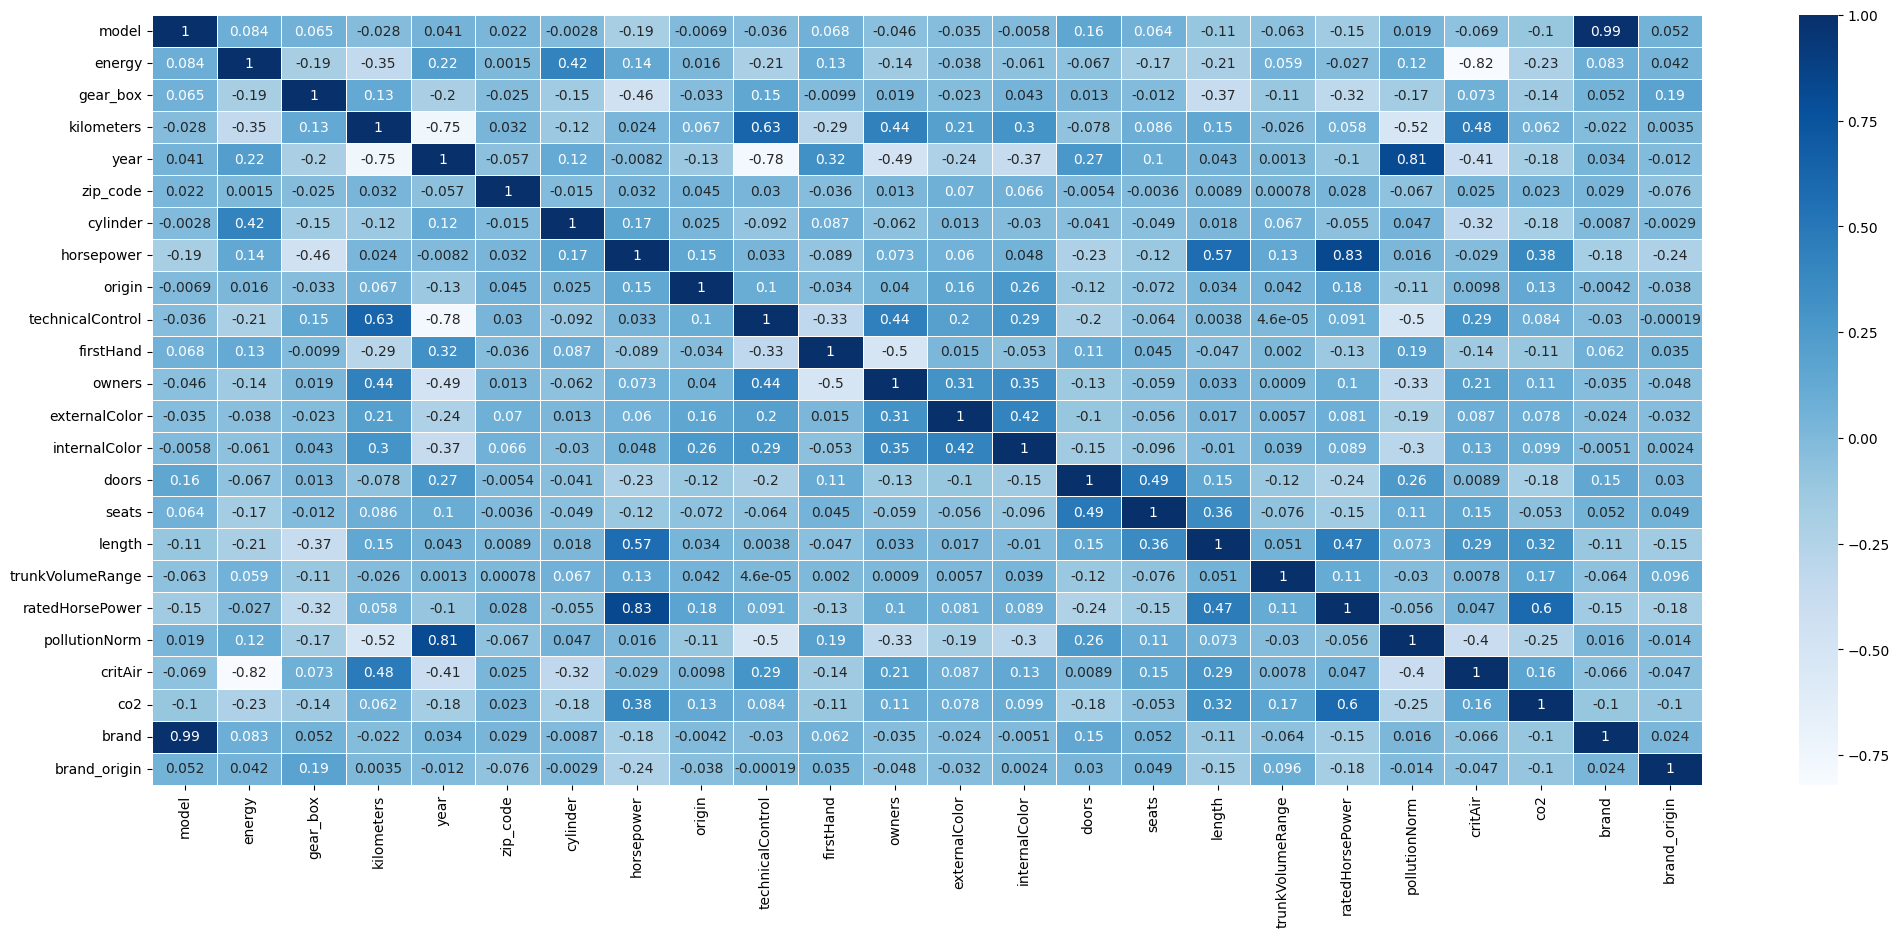

In [14]:
corr = X.corr()
fig, ax = plt.subplots(figsize=(25,10))
sns.heatmap(corr, cmap="Blues", xticklabels=corr.columns, yticklabels=corr.columns, annot=True, linewidths=.5, ax=ax)

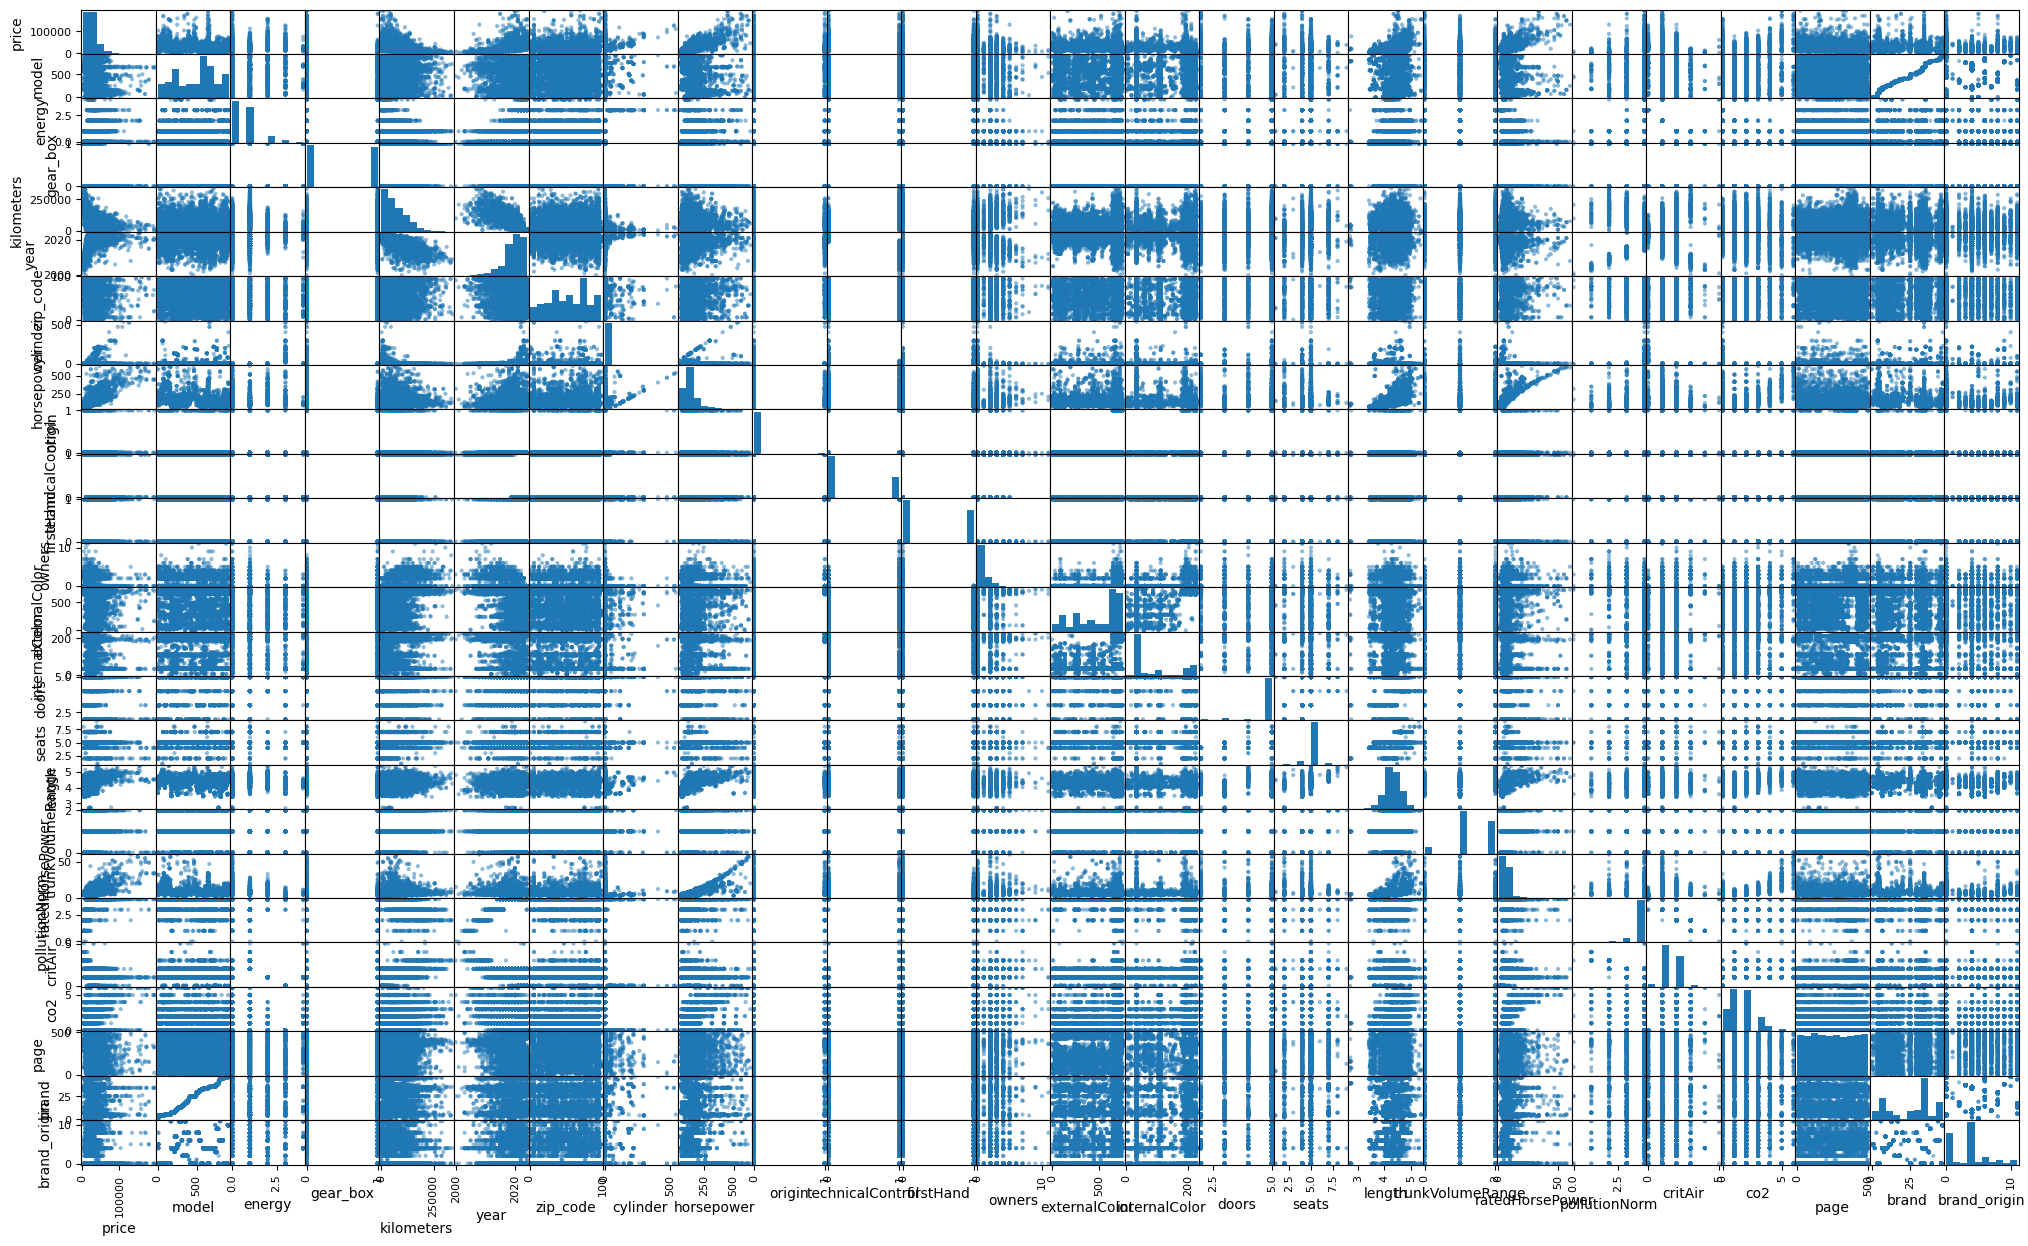

In [37]:
# from pandas.plotting import scatter_matrix
# scatter_mat = scatter_matrix(car, figsize = (25,15))

In [15]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.33, random_state=42)

In [16]:
regressor = XGBRegressor()
regressor.fit(X_train, Y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

In [20]:
y_pred = regressor.predict(X_test)
mean_squared_error(y_pred, Y_test)

23983115.169627037

In [21]:
r2_score(y_pred, Y_test)

0.9229346967651617

In [22]:
pickle.dump(regressor, open('model', 'wb'))

<Axes: >

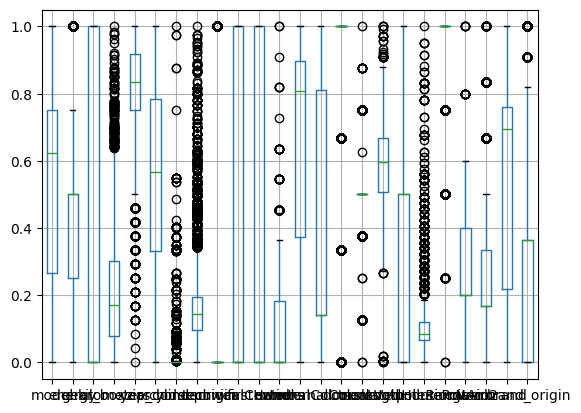

In [23]:
from sklearn.preprocessing import MinMaxScaler
min_max = MinMaxScaler()
df_minmax = min_max.fit_transform(X)
df_minmax = pd.DataFrame(df_minmax, columns=X.columns, index=X.index)
df_minmax.boxplot()

In [24]:
X_train, X_test, Y_train, Y_test = train_test_split(df_minmax,Y,test_size=0.33, random_state=42)
regressor = XGBRegressor()
regressor.fit(X_train, Y_train)
y_pred = regressor.predict(X_test)
print(mean_squared_error(y_pred, Y_test))
print(r2_score(y_pred, Y_test))

23990115.84591584
0.9229093882765125
